## A Simple Strategy Backtest

In [1]:
import bt
import warnings

# FutureWarning 무시 설정
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

| 티커 | 설명                                                                                   |
|------|----------------------------------------------------------------------------------------|
| SPY  | SPDR S&P 500 ETF. 미국의 대표적인 상장지수펀드로, S&P 500 지수를 추종. 대형주 500개로 구성된 지수를 반영. |
| AGG  | iShares Core U.S. Aggregate Bond ETF. 미국 전체 채권 시장을 추종하는 ETF. 정부 채권, 회사채, 자산유동화증권(ABS) 등이 포함. |


In [2]:
# fetch some data
data = bt.get('spy,agg', start='2010-01-01')
print(data.tail())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                   spy         agg
Date                              
2024-07-29  544.760010   98.177933
2024-07-30  542.000000   98.277626
2024-07-31  550.809998   98.806000
2024-08-01  543.010010   99.220001
2024-08-02  532.900024  100.330002


In [3]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [4]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


<Axes: title={'center': 'Equity Progression'}>

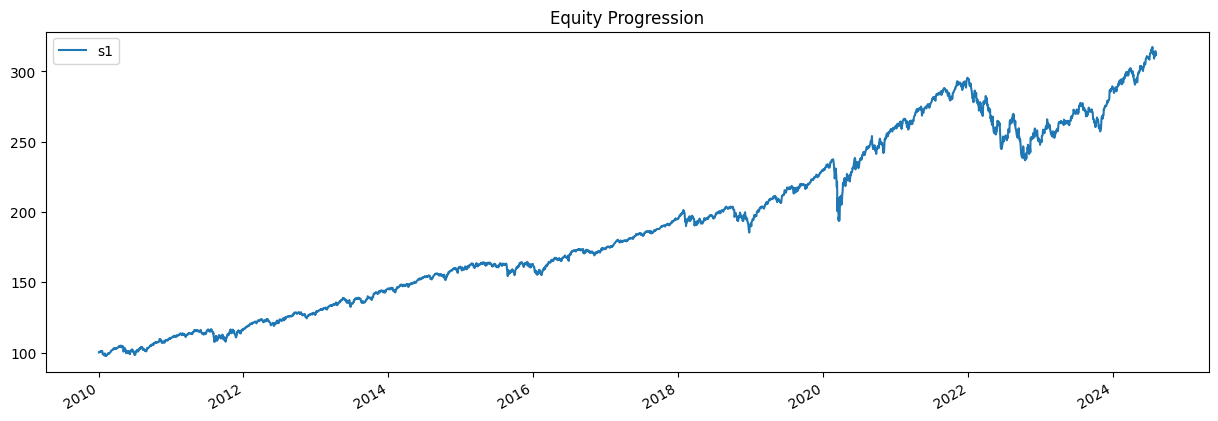

In [5]:
# first let's see an equity curve
res.plot()

In [6]:
# ok and what about some stats?
res.display()

Stat                 s1
-------------------  ----------
Start                2010-01-03
End                  2024-08-02
Risk-free rate       0.00%

Total Return         211.62%
Daily Sharpe         0.93
Daily Sortino        1.45
CAGR                 8.11%
Max Drawdown         -19.87%
Calmar Ratio         0.41

MTD                  -0.86%
3m                   5.90%
6m                   6.24%
YTD                  8.09%
1Y                   13.88%
3Y (ann.)            3.22%
5Y (ann.)            7.63%
10Y (ann.)           7.38%
Since Incep. (ann.)  8.11%

Daily Sharpe         0.93
Daily Sortino        1.45
Daily Mean (ann.)    8.19%
Daily Vol (ann.)     8.78%
Daily Skew           -0.71
Daily Kurt           13.88
Best Day             4.77%
Worst Day            -6.63%

Monthly Sharpe       1.02
Monthly Sortino      1.86
Monthly Mean (ann.)  8.29%
Monthly Vol (ann.)   8.15%
Monthly Skew         -0.33
Monthly Kurt         1.02
Best Month           7.57%
Worst Month          -6.68%

Yearly Shar

| 항목                  | 설명                                                                          |
|-----------------------|-------------------------------------------------------------------------------|
| Start                 | 백테스트 시작 날짜. 백테스트가 시작된 날짜를 나타냅니다.                      |
| End                   | 백테스트 종료 날짜. 백테스트가 종료된 날짜를 나타냅니다.                      |
| Risk-free rate        | 무위험 이자율. 일반적으로 안전한 국채 수익률을 사용하며, 투자 성과 평가 시 기준이 됩니다.|
| Total Return          | 총 수익률. 투자 기간 동안의 전체 수익률을 나타냅니다.                        |
| Daily Sharpe          | 일일 샤프 비율. 수익률의 표준편차 대비 초과수익률을 나타내며, 위험 조정 성과를 평가합니다.|
| Daily Sortino         | 일일 소르티노 비율. 변동성 대신 하락 위험에 대해 조정된 초과수익률을 평가합니다.|
| CAGR                  | 연평균 성장률. 연간 복리 수익률로, 장기 성과를 나타냅니다.                  |
| Max Drawdown          | 최대 손실. 투자 기간 중 최고점에서 최저점까지의 최대 자산 손실을 나타냅니다.|
| Calmar Ratio          | 칼마 비율. 연평균 수익률을 최대 손실로 나눈 값으로, 위험 대비 수익률을 평가합니다.|
| MTD                   | 이번 달 수익률. 현재 달의 시작부터 현재까지의 수익률을 나타냅니다.          |
| 3m                    | 최근 3개월 수익률. 마지막 3개월 동안의 총 수익률을 나타냅니다.              |
| 6m                    | 최근 6개월 수익률. 마지막 6개월 동안의 총 수익률을 나타냅니다.              |
| YTD                   | 연초 이후 수익률. 해당 연도의 시작부터 현재까지의 수익률을 나타냅니다.      |
| 1Y                    | 최근 1년 수익률. 마지막 1년 동안의 총 수익률을 나타냅니다.                  |
| 3Y (ann.)             | 최근 3년 연평균 수익률. 마지막 3년 동안의 연간 복리 수익률을 나타냅니다.     |
| 5Y (ann.)             | 최근 5년 연평균 수익률. 마지막 5년 동안의 연간 복리 수익률을 나타냅니다.     |
| 10Y (ann.)            | 최근 10년 연평균 수익률. 마지막 10년 동안의 연간 복리 수익률을 나타냅니다.   |
| Since Incep. (ann.)   | 시작 이후 연평균 수익률. 투자 시작 이후의 연간 복리 수익률을 나타냅니다.     |
| Daily Mean (ann.)     | 일일 평균 수익률의 연환산 값. 일일 수익률의 평균을 연환산한 값입니다.        |
| Daily Vol (ann.)      | 일일 수익률의 연환산 변동성. 일일 수익률의 표준편차를 연환산한 값입니다.     |
| Daily Skew            | 일일 수익률의 왜도. 일일 수익률 분포의 비대칭 정도를 나타냅니다.             |
| Daily Kurt            | 일일 수익률의 첨도. 일일 수익률 분포의 꼬리 두께를 나타냅니다.              |
| Best Day              | 최고의 하루 수익률. 백테스트 기간 중 가장 높은 일일 수익률을 나타냅니다.    |
| Worst Day             | 최악의 하루 수익률. 백테스트 기간 중 가장 낮은 일일 수익률을 나타냅니다.    |
| Monthly Mean (ann.)   | 월간 평균 수익률의 연환산 값. 월간 수익률의 평균을 연환산한 값입니다.        |
| Monthly Vol (ann.)    | 월간 수익률의 연환산 변동성. 월간 수익률의 표준편차를 연환산한 값입니다.     |
| Monthly Skew          | 월간 수익률의 왜도. 월간 수익률 분포의 비대칭 정도를 나타냅니다.             |
| Monthly Kurt          | 월간 수익률의 첨도. 월간 수익률 분포의 꼬리 두께를 나타냅니다.              |
| Best Month            | 최고의 월간 수익률. 백테스트 기간 중 가장 높은 월간 수익률을 나타냅니다.    |
| Worst Month           | 최악의 월간 수익률. 백테스트 기간 중 가장 낮은 월간 수익률을 나타냅니다.    |
| Yearly Mean           | 연평균 수익률. 연간 수익률의 평균입니다.                                     |
| Yearly Vol            | 연간 변동성. 연간 수익률의 표준편차를 나타냅니다.                           |
| Yearly Skew           | 연간 수익률의 왜도. 연간 수익률 분포의 비대칭 정도를 나타냅니다.            |
| Yearly Kurt           | 연간 수익률의 첨도. 연간 수익률 분포의 꼬리 두께를 나타냅니다.             |
| Best Year             | 최고의 연간 수익률. 백테스트 기간 중 가장 높은 연간 수익률을 나타냅니다.   |
| Worst Year            | 최악의 연간 수익률. 백테스트 기간 중 가장 낮은 연간 수익률을 나타냅니다.   |
| Avg. Drawdown         | 평균 손실. 백테스트 기간 중 발생한 손실의 평균값을 나타냅니다.              |
| Avg. Drawdown Days    | 평균 손실 기간. 평균 손실이 발생한 기간의 길이를 나타냅니다.               |
| Avg. Up Month         | 평균 상승 월간 수익률. 월간 수익이 양수인 월의 평균 수익률을 나타냅니다.     |
| Avg. Down Month       | 평균 하락 월간 수익률. 월간 수익이 음수인 월의 평균 수익률을 나타냅니다.     |
| Win Year %            | 연간 수익이 양수인 연도의 비율. 전체 백테스트 기간 중 수익이 양수인 연도의 비율을 나타냅니다.|
| Win 12m %             | 12개월 연속 수익이 양수인 기간의 비율. 전체 백테스트 기간 중 12개월 연속 수익이 양수인 기간의 비율을 나타냅니다. |


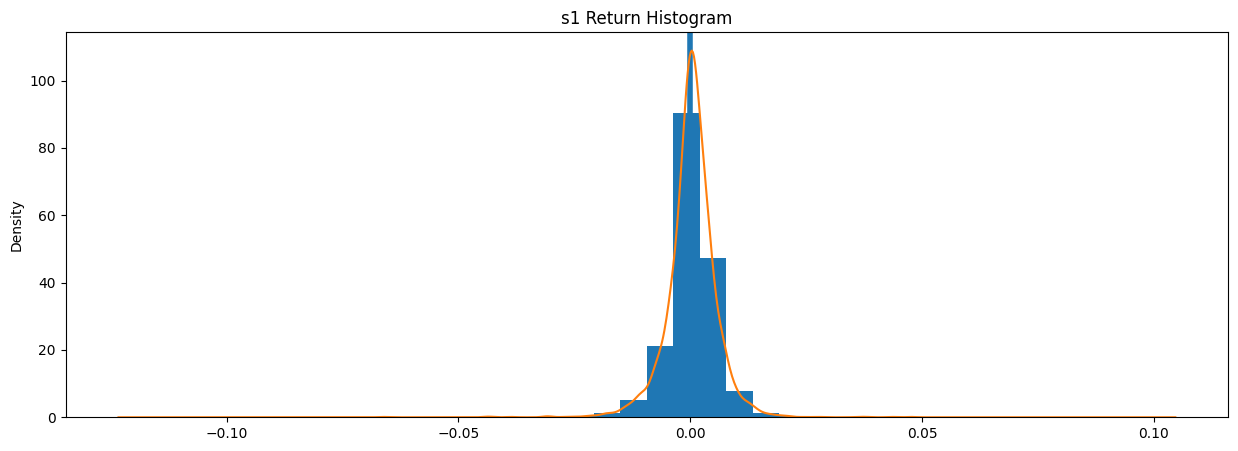

In [7]:
# ok and how does the return distribution look like?
res.plot_histogram()

### 히스토그램의 의미

1. **가로축 (X축)**:
   - 수익률(Returns)을 나타냅니다. 여기에는 음수와 양수의 수익률이 포함되어 있습니다.
   - 예를 들어, 0.00은 수익률이 0%임을 의미하며, -0.05는 수익률이 -5%, 0.05는 수익률이 5%임을 의미합니다.

2. **세로축 (Y축)**:
   - 밀도(Density)를 나타냅니다. 특정 수익률 구간에 얼마나 많은 데이터 포인트가 있는지를 나타냅니다.
   - 값이 높을수록 해당 수익률 구간에 더 많은 데이터 포인트가 있음을 의미합니다.

3. **파란색 막대**:
   - 각 구간의 실제 수익률 분포를 나타냅니다. 각 막대의 높이는 해당 구간에 속하는 수익률 데이터 포인트의 빈도를 나타냅니다.
   - 막대가 높을수록 해당 수익률 구간에 많은 관측치가 있음을 의미합니다.

4. **주황색 선**:
   - 수익률 분포의 커널 밀도 추정(Kernel Density Estimation, KDE)을 나타냅니다. 이는 수익률의 연속적인 분포를 부드럽게 나타내는 곡선입니다.
   - 이 선은 데이터의 밀도를 보다 부드럽게 보여주며, 수익률이 주로 어떤 범위에 분포하는지 시각적으로 이해하는 데 도움을 줍니다.

### 히스토그램 해석

- **정상 분포와의 비교**:
  - 히스토그램과 KDE 커브가 대체로 대칭적이며 중앙에 집중되어 있다면, 이는 수익률이 정상 분포에 가깝다는 것을 시사합니다.
  - 하지만, 비대칭성(왜도)이나 꼬리가 두꺼운 부분(첨도)이 존재한다면 이는 수익률 분포가 정규 분포와 다를 수 있음을 나타냅니다.

- **평균과 중앙값**:
  - 대부분의 수익률이 0% 근처에 모여 있다면, 이는 전략이 대부분의 기간 동안 큰 손실이나 큰 이익을 내지 않았음을 의미합니다.

- **리스크와 변동성**:
  - 수익률의 분포가 넓을수록 변동성이 크다는 것을 의미합니다. 즉, 막대가 넓은 범위에 걸쳐 분포되어 있다면, 이는 전략의 수익률이 더 큰 변동성을 보인다는 것을 나타냅니다.

이 히스토그램은 전략 `s1`의 성과가 대부분 작고 빈번한 수익률을 보이며, 큰 손실이나 큰 이익은 비교적 드물다는 것을 시사할 수 있습니다. 이를 통해 전략의 리스크 프로파일과 평균 수익률을 시각적으로 이해할 수 있습니다.

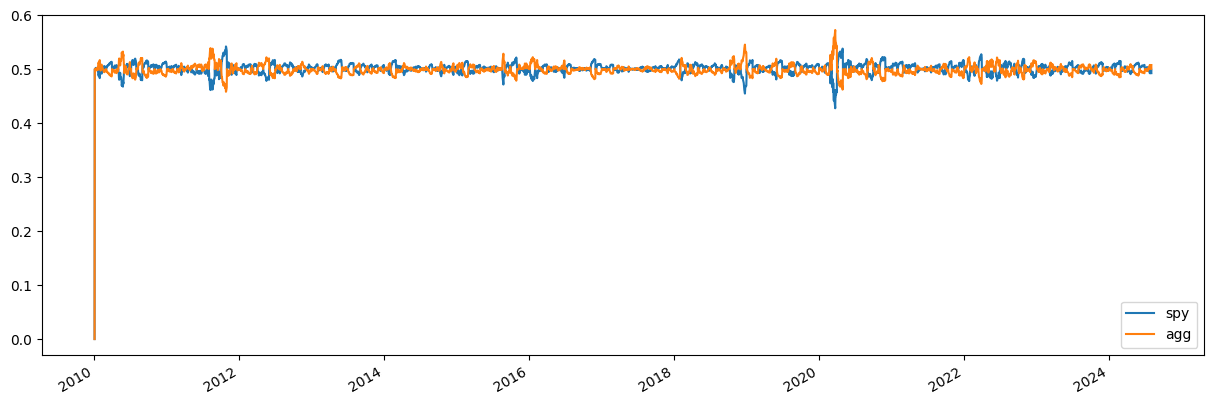

In [8]:
# and just to make sure everything went along as planned, let's plot the security weights over time
res.plot_security_weights()

이 그래프는 `res.plot_security_weights()` 함수를 사용하여 생성된 것으로, 투자 포트폴리오 내에서 각 자산(SPY와 AGG)의 비중이 시간에 따라 어떻게 변화했는지를 보여줍니다. 다음은 이 그래프에 대한 자세한 설명입니다:

### 그래프 설명

1. **가로축 (X축)**:
   - 시간(Time)을 나타냅니다. 2010년부터 2024년까지의 기간을 커버합니다.
   - 이 축은 백테스트가 진행된 기간을 나타냅니다.

2. **세로축 (Y축)**:
   - 비중(Weights)을 나타냅니다. 0에서 0.6까지의 값으로 표현됩니다.
   - 각 자산이 포트폴리오 내에서 차지하는 비율을 나타냅니다.

3. **파란색 선 (SPY)**:
   - SPDR S&P 500 ETF(SPY)의 포트폴리오 내 비중을 나타냅니다.
   - 시간이 지남에 따라 SPY의 비중이 변동하는 것을 보여줍니다.

4. **주황색 선 (AGG)**:
   - iShares Core U.S. Aggregate Bond ETF(AGG)의 포트폴리오 내 비중을 나타냅니다.
   - 시간이 지남에 따라 AGG의 비중이 변동하는 것을 보여줍니다.

### 그래프 해석

- **초기 비중**:
  - 초기에는 AGG의 비중이 매우 높게 시작되고, SPY의 비중은 낮습니다. 이는 초기 투자 비중 설정의 결과일 수 있습니다.
  
- **비중 조정**:
  - 시간이 지남에 따라 두 자산의 비중이 거의 균등하게 유지되는 것을 볼 수 있습니다. 이는 `bt.algos.WeighEqually()`와 `bt.algos.Rebalance()` 알고리즘이 적용된 결과로, 매월 말에 포트폴리오를 재조정하여 두 자산의 비중을 동일하게 맞추기 때문입니다.

- **변동성**:
  - 두 자산의 비중이 약간의 변동을 보이지만, 대체로 0.5 부근에서 유지됩니다. 이는 주기적인 리밸런싱이 잘 수행되고 있음을 나타냅니다.
  - SPY와 AGG는 서로 반대 방향으로 움직이는 경향이 있으며, 이는 포트폴리오의 리스크를 관리하는 데 도움이 됩니다.

### 종합

이 그래프는 포트폴리오의 자산 비중이 시간에 따라 어떻게 변화하는지를 시각적으로 나타내며, 매월 리밸런싱을 통해 두 자산의 비중을 균등하게 유지하는 전략이 잘 실행되었음을 보여줍니다.

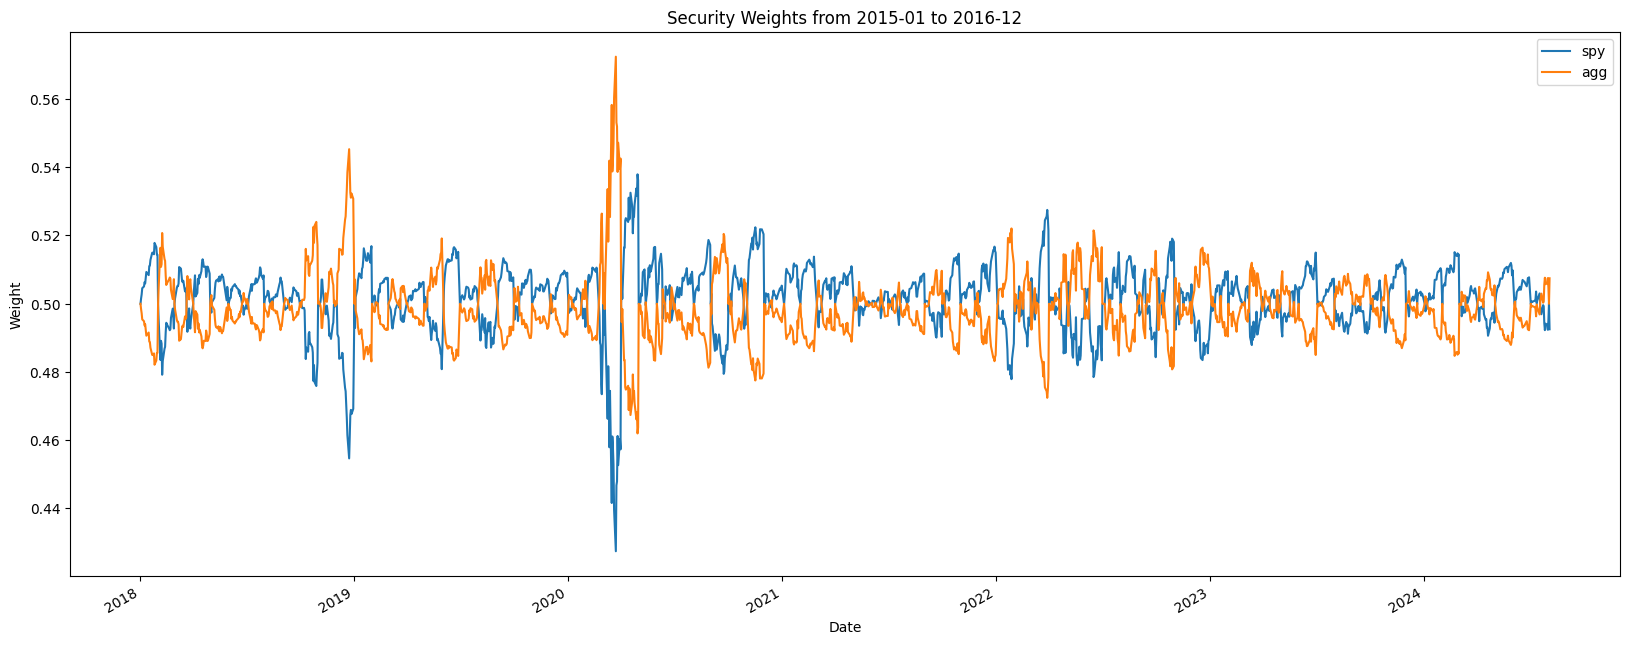

In [9]:
import matplotlib.pyplot as plt

# 포트폴리오 비중 데이터 가져오기
weights = res.get_security_weights()

# 특정 기간 필터링 (예: 2015년 1월부터 2016년 12월까지)
filtered_weights = weights.loc['2018-01-01':'2024-12-31']

# 필터링된 데이터로 그래프 그리기
fig, ax = plt.subplots(figsize=(20, 8))  # 가로 길이를 20, 세로 길이를 8로 설정하여 더 길게 만듦
filtered_weights.plot(ax=ax)
ax.set_title('Security Weights from 2015-01 to 2016-12')
ax.set_xlabel('Date')
ax.set_ylabel('Weight')
ax.legend(loc='best')
plt.show()

## Modifying a Strategy

100%|██████████| 2/2 [00:01<00:00,  1.93it/s]


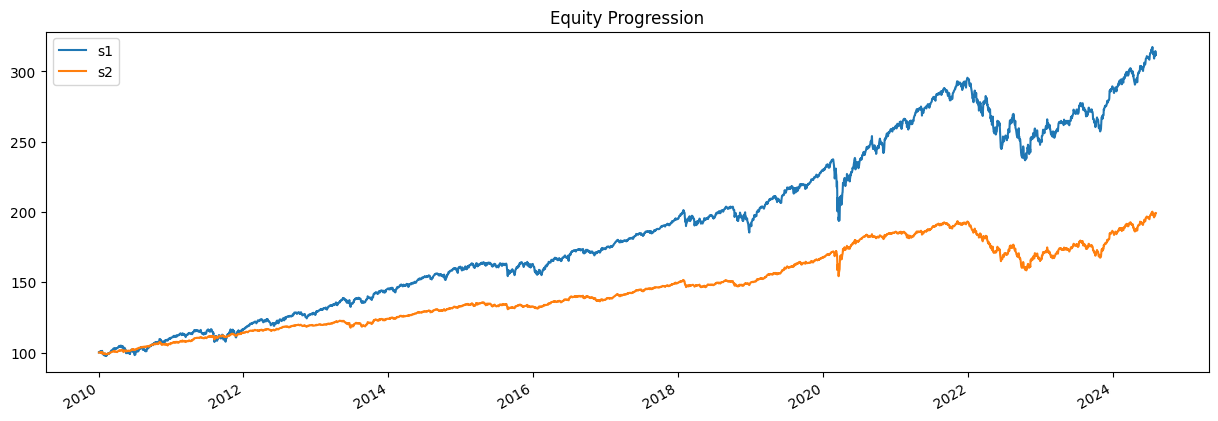

In [10]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot();

`bt` 라이브러리에서 정의된 새로운 전략 `s2`를 살펴보겠습니다. 이 전략은 다음과 같은 알고리즘을 사용하여 구성됩니다:

### 전략 구성 요소

1. **`bt.algos.RunWeekly()`**:
   - 이 알고리즘은 전략이 매주 한 번씩 실행되도록 합니다. 즉, 매주 말에 정의된 다른 알고리즘들이 실행됩니다.
   - 이 설정은 주간 리밸런싱을 의미합니다.

2. **`bt.algos.SelectAll()`**:
   - 이 알고리즘은 데이터셋에 있는 모든 자산을 선택합니다. 특정 자산을 필터링하거나 선택하는 대신, 데이터셋에 포함된 모든 자산에 대해 작업을 수행합니다.
   - 예를 들어, SPY와 AGG를 포함하는 데이터셋이라면, 이 두 자산을 모두 선택합니다.

3. **`bt.algos.WeighInvVol()`**:
   - 이 알고리즘은 자산의 역변동성에 따라 비중을 할당합니다. 변동성이 낮은 자산에 더 많은 비중을 할당하고, 변동성이 높은 자산에 적은 비중을 할당합니다.
   - 변동성은 자산의 리스크를 나타내며, 이 알고리즘은 리스크가 낮은 자산에 더 많이 투자하는 전략입니다.
   - 자산의 비중은 일반적으로 자산의 표준편차(변동성)의 역수로 계산됩니다.

4. **`bt.algos.Rebalance()`**:
   - 이 알고리즘은 포트폴리오를 재조정합니다. 설정된 비중에 맞추어 자산을 매매하여 포트폴리오를 조정합니다.
   - 매주 말에 선택된 비중에 맞추어 포트폴리오를 조정합니다.


### 설명

1. **데이터 불러오기**:
   - `bt.get('spy,agg', start='2010-01-01')`를 사용하여 데이터 불러옵니다.

2. **전략 정의**:
   - 매주 리밸런싱을 포함한 전략을 정의합니다.

3. **백테스트 실행**:
   - `bt.Backtest`와 `bt.run`을 사용하여 백테스트를 실행합니다.

4. **포트폴리오 비중 데이터 가져오기**:
   - `res.get_security_weights()`를 사용하여 포트폴리오 내 각 자산의 비중 데이터를 가져옵니다.

5. **특정 기간 필터링**:
   - `weights.loc['2015-01-01':'2016-12-31']`를 사용하여 원하는 기간의 데이터만 선택합니다.

6. **그래프 그리기**:
   - `matplotlib`를 사용하여 필터링된 데이터로 그래프를 그립니다.

이 방법을 사용하면 전략 `s2`의 포트폴리오 비중 변화를 시각적으로 확인할 수 있습니다.

In [12]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2010-01-03  2010-01-03
End                  2024-08-02  2024-08-02
Risk-free rate       0.00%       0.00%

Total Return         211.62%     99.06%
Daily Sharpe         0.93        0.95
Daily Sortino        1.45        1.46
CAGR                 8.11%       4.84%
Max Drawdown         -19.87%     -18.01%
Calmar Ratio         0.41        0.27

MTD                  -0.86%      -0.05%
3m                   5.90%       5.82%
6m                   6.24%       5.71%
YTD                  8.09%       7.07%
1Y                   13.88%      12.48%
3Y (ann.)            3.22%       1.34%
5Y (ann.)            7.63%       4.27%
10Y (ann.)           7.38%       4.43%
Since Incep. (ann.)  8.11%       4.84%

Daily Sharpe         0.93        0.95
Daily Sortino        1.45        1.46
Daily Mean (ann.)    8.19%       4.86%
Daily Vol (ann.)     8.78%       5.12%
Daily Skew           -0.71       -1.06
Daily Kurt

### 기능 설명

1. **트리 구조 (Tree Structure)**:
   - **설명**: 트리 구조는 모듈화되고 재사용 가능한 복잡한 알고리즘 트레이딩 전략을 구성하고 조합하는 데 도움을 줍니다. 각 트리 노드는 자체 가격 지수를 가지며, 이 지수는 알고리즘이 노드의 할당을 결정하는 데 사용됩니다.
   - **의미**: 이 구조는 전략을 계층적으로 관리할 수 있게 하여 복잡한 전략을 체계적으로 구성할 수 있습니다. 각 노드가 독립적으로 작동하면서도 전체 전략의 일부로 통합될 수 있어, 전략의 유연성과 확장성을 높입니다.

2. **알고리즘 스택 (Algorithm Stacks)**:
   - **설명**: 알고리즘과 알고리즘 스택은 모듈화되고 재사용 가능한 전략 논리를 쉽게 생성할 수 있도록 도와주는 핵심 기능입니다. 이러한 모듈화 덕분에 논리 블록을 쉽게 테스트할 수 있어 견고한 금융 솔루션을 구축하는 중요한 단계가 됩니다.
   - **의미**: 알고리즘 스택을 사용하면 작은 논리 블록을 만들어 조합하여 큰 전략을 구성할 수 있습니다. 이렇게 하면 각 블록을 개별적으로 테스트하고 최적화할 수 있어 전체 전략의 신뢰성과 성능을 높일 수 있습니다.

3. **거래 비용 모델링 (Transaction Cost Modeling)**:
   - **설명**: 커미션 함수와 백테스트에 전달된 금융상품별 시간 변동적인 매수/매도 스프레드를 사용하여 거래 비용을 모델링할 수 있습니다.
   - **의미**: 실제 거래에서는 거래 비용이 중요한 변수입니다. 이 기능을 통해 백테스트에서 거래 비용을 현실적으로 반영하여 보다 정확한 성과 평가를 할 수 있습니다.

4. **고정 수익 (Fixed Income)**:
   - **설명**: 전략은 채권과 같은 쿠폰 지급 금융상품, 스왑과 같은 비펀딩 금융상품, 보유 비용, 명목 가중치 옵션 등을 포함할 수 있습니다. 이는 트리 구조의 확장 기능입니다.
   - **의미**: 다양한 금융상품을 포함한 전략을 만들 수 있어, 단순 주식 거래 외에 채권, 스왑 등 다양한 자산 클래스를 포함하는 복합 전략을 구현할 수 있습니다.

5. **차트 및 보고 (Charting and Reporting)**:
   - **설명**: bt는 백테스트 결과를 시각화하는 데 도움이 되는 여러 유용한 차트 기능을 제공합니다. 앞으로 자동 생성 PDF 보고서와 같은 추가 차트, 테이블 및 보고서 형식을 추가할 계획입니다.
   - **의미**: 시각적 도구를 통해 백테스트 결과를 쉽게 이해하고 분석할 수 있습니다. 또한, 향후 추가될 보고서 기능을 통해 전략의 성과를 체계적으로 기록하고 공유할 수 있습니다.

6. **상세한 통계 (Detailed Statistics)**:
   - **설명**: bt는 백테스트와 관련된 다양한 통계를 계산하며, 다양한 백테스트 간의 이러한 통계를 비교하는 간단한 방법을 제공합니다.
   - **의미**: 다양한 성과 지표를 통해 전략의 성과를 다각도로 평가할 수 있으며, 여러 백테스트 결과를 쉽게 비교할 수 있어 전략의 개선 방향을 파악하는 데 유리합니다.


## 알고리듬 설명
https://pmorissette.github.io/bt/bt.html#module-bt.algos

`bt` 라이브러리의 알고리즘 페이지는 알고리즘 및 알고리즘 스택의 사용법에 대한 설명과 예제를 제공합니다. 

### 1. 알고리즘 개요

**알고리즘 (Algos)**:
- 트레이딩 전략의 핵심 구성 요소로, 특정 조건에 따라 True 또는 False를 반환합니다.
- 예: `bt.algos.RunMonthly`는 매월 실행 여부를 확인합니다.

**알고리즘 스택 (AlgoStacks)**:
- 여러 알고리즘을 그룹화하여 순차적으로 실행합니다.
- 모든 알고리즘이 True를 반환할 때까지 실행됩니다.

### 2. 데이터 전달

알고리즘 간에 데이터를 전달하기 위해 전략(Strategy)에는 `temp`와 `perm`이라는 두 가지 속성이 있습니다. 이들은 모두 딕셔너리이며, 알고리즘이 생성한 데이터를 저장하는 데 사용됩니다. 임시 데이터(temp)는 데이터 변경 시마다 갱신되며, 영구 데이터(perm)는 변경되지 않습니다.

알고리즘은 보통 `temp`나 `perm` 객체에 값을 설정하거나 필요로 합니다. 예를 들어, `bt.algos.WeighEqually` 알고리즘은 `temp`에 'weights' 키를 설정하고, 'selected' 키를 필요로 합니다.

#### 예시

단순한 선택 -> 가중치 부여 -> 할당 로직 체인을 예로 들어보겠습니다. 이 전략을 세 가지 알고리즘으로 나눌 수 있습니다:

1. **선택(Selection)**: 투자 가능한 자산 중에서 어떤 증권에 자본을 할당할 것인가를 결정합니다. 예: `SelectAll`, `SelectThese`, `SelectWhere`, `SelectN` 등.

2. **가중치 부여(Weighting)**: 선택된 증권 각각에 목표 포트폴리오에서 얼마나 많은 비중을 부여할 것인가를 결정합니다. 예: `WeighEqually`, `WeighRandomly`, `WeighSpecified`, `WeighTarget`, `WeighInvVol`, `WeighMeanVar` 등.

3. **할당(Allocate)**: 더 이상 필요하지 않은 포지션을 청산하고 선택된 증권에 자본을 할당합니다. 예: `Rebalance`.

이 경우, 선택 알고리즘은 전략의 `temp` 딕셔너리에 'selected' 키를 설정하고, 가중치 부여 알고리즘은 해당 값을 읽어 'weights' 키를 설정합니다. 할당 알고리즘은 'weights' 값을 읽어 이에 따라 행동합니다.

#### 확장

단순한 선택 -> 가중치 부여 -> 할당 로직 체인에 추가적인 리스크/노출 계산 단계를 포함시키려면, 이를 위한 특정 알고리즘을 구현해야 합니다. 이러한 알고리즘은 가중치 부여 전에(리스크 기반 포트폴리오 구성) 또는 후에(보고용) 사용될 수 있습니다. 예: `UpdateRisk`.

#### 유효성 검사

최대의 유연성을 유지하기 위해 현재는 알고리즘 스택의 유효성을 검사하지 않습니다. 따라서 사용자가 요구사항과 부작용을 잘 문서화하고 올바르게 사용해야 합니다. 개발자는 docstring에 "sets"와 "requires"를 명시해야 합니다. 예: `bt.algos.WeighEqually`의 docstring 참조.

더 자세한 내용은 [bt 알고리즘 문서](https://pmorissette.github.io/bt/algos.html)를 참조하십시오.

### 3. 구현

알고리즘은 상태를 유지해야 하는 경우 클래스 형태로 구현됩니다:

```python
class MyAlgo(bt.Algo):
    def __init__(self, arg1, arg2):
        self.arg1 = arg1
        self.arg2 = arg2

    def __call__(self, target):
        # 로직 구현
        return True
```

### 4. 모범 사례

#### 재사용성 (Re-usability)

알고리즘(Algos)은 다른 백테스트 (다른 기초 증권 우주 또는 다른 시간 범위를 포함하는)에서도 재사용 가능해야 합니다. 백테스트는 전략과 데이터의 논리적 조합입니다. 그러나 알고리즘이 증권 우주나 시간 범위에 따라 달라지는 추가 데이터를 사용해야 하는 경우도 있습니다 (예: 미리 계산된 신호의 데이터 프레임).

이 문제를 해결하는 가장 좋은 방법은 알고리즘을 데이터 이름으로 구성하고, 이 이름으로 데이터를 인스턴스화하여 백테스트를 수행하는 것입니다.

알고리즘은 재사용 가능해야 하며 다양한 데이터 및 기간에 대해 동일하게 작동해야 합니다:

```python
class MyAlgo(bt.Algo):
    def __init__(self, signal_name):
        self.signal_name = signal_name

    def __call__(self, target):
        # 데이터 접근
        return True

# 전략 생성
s = bt.Strategy('s1', [bt.algos.MyAlgo('my_signal')])
# 백테스트 실행
test = bt.Backtest(s, data, additional_data={'my_signal': signal_df})
res = bt.run(test)
```

일부 추가 데이터 키는 프레임워크 자체에서 추가 기능을 지원하기 위해 사용됩니다. (예: bidoffer, coupon, cost_long 및 cost_short). 이러한 키들은 Security 및 CouponPayingSecurity의 설정 함수에서 문서화되어 있습니다.

### 5. 디버깅

디버깅 알고리즘을 활용하거나 직접 작성하여 알고리즘 스택에 삽입하고 전략의 상태를 검사할 수 있습니다.

- Debug

- PrintTempData

- PrintInfo

- PrintRisk

### 6. 분기 및 제어 흐름

알고리즘 설정은 단순히 True 또는 False를 반환하는 함수 목록처럼 보일 수 있지만, 이는 복잡한 분기 및 조건 구조를 가능하게 하는 강력한 구성입니다. 특히, 분기는 `Or` 알고리즘을 통해 구현됩니다.

예를 들어, 아래 코드에서는 포트폴리오 리밸런싱과 다른 타임라인에서 전략 성과를 출력하는 방법을 보여줍니다. 추가 조건은 관련 스택의 맨 앞에 알고리즘을 배치하여 추가할 수 있습니다.

```python
import bt

data = bt.get('spy,agg', start='2010-01-01')

logging_stack = bt.AlgoStack(
                    bt.algos.RunWeekly(),
                    bt.algos.PrintInfo('{name}:{now}. Value:{_value:0.0f}, Price:{_price:0.4f}')
                    )
trading_stack = bt.AlgoStack(
                    bt.algos.RunMonthly(),
                    bt.algos.SelectAll(),
                    bt.algos.WeighEqually(),
                    bt.algos.Rebalance()
                    )
branch_stack = bt.AlgoStack(bt.algos.Or([logging_stack, trading_stack]))

s = bt.Strategy('strategy', branch_stack, ['spy', 'agg'])
t = bt.Backtest(s, data)
r = bt.run(t)
```

위 예제는 주간 로그 스택과 월간 리밸런싱 스택을 분기 전략으로 사용하는 방법을 보여줍니다.

### 7. 주요 기능 설명

1. **트리 구조**: 전략을 계층적으로 관리, 모듈화된 재사용 가능 알고리즘.
2. **알고리즘 스택**: 모듈화된 논리 블록으로 전략 구성, 테스트 용이.
3. **거래 비용 모델링**: 현실적인 거래 비용 반영.
4. **고정 수익**: 채권, 스왑 등 다양한 자산 클래스 포함.
5. **차트 및 보고**: 백테스트 결과 시각화 도구 제공.
6. **상세한 통계**: 다양한 성과 지표를 통한 전략 평가.

[출처: bt 알고리즘 문서](https://pmorissette.github.io/bt/algos.html)

In [49]:
import bt
import yfinance as yf
import pandas as pd

# yfinance로 KOSPI 지수와 개별 주식 데이터 가져오기
tickers = ['278530.KS', '456880.KS', '411060.KS', '423160.KS']
data = yf.download(tickers, start='2010-01-01')

# 필요한 열 선택 및 열 이름 변경
kospi = data['Adj Close']['278530.KS'].rename('KOSPI_TR')
sofr = data['Adj Close']['456880.KS'].rename('SOFR')
gold = data['Adj Close']['411060.KS'].rename('GOLD')
kofr = data['Adj Close']['423160.KS'].rename('KOFR')

# 데이터프레임을 bt가 사용할 수 있는 형식으로 변환
data1 = pd.concat([kofr, sofr], axis=1)
data1 = data1.dropna()
data2 = pd.concat([kospi, sofr, gold], axis=1)
data2 = data2.dropna()
data3 = pd.concat([kofr, sofr, gold], axis=1)
data3 = data3.dropna()

# 백테스트용 데이터를 확인합니다.
print(data1.tail())
print(data2.tail())

# 백테스트 전략 정의
strategy1 = bt.Strategy('KOFR and SOFR Weekly Strategy', [
    bt.algos.RunWeekly(),
    bt.algos.SelectAll(),
    bt.algos.WeighEqually(),
    bt.algos.Rebalance()
])

strategy2 = bt.Strategy('KOSPI, SOFR, and GOLD Strategy', [
    bt.algos.RunMonthly(),
    bt.algos.SelectAll(),
    bt.algos.WeighEqually(),
    bt.algos.Rebalance()
])

strategy3 = bt.Strategy('KOFR, SOFR, and GOLD Weekly Strategy', [
    bt.algos.RunWeekly(),
    bt.algos.SelectAll(),
    bt.algos.WeighEqually(),
    bt.algos.Rebalance()
])

# 백테스트 실행
test1 = bt.Backtest(strategy1, data1)
test2 = bt.Backtest(strategy2, data2)
test3 = bt.Backtest(strategy3, data3)
result = bt.run(test1, test2, test3)

# 백테스트 결과 출력
result.display()


[*********************100%%**********************]  4 of 4 completed


                KOFR     SOFR
Date                         
2024-07-29  107540.0  11150.0
2024-07-30  107550.0  11155.0
2024-07-31  107560.0  11110.0
2024-08-01  107570.0  11005.0
2024-08-02  107600.0  11050.0
            KOSPI_TR     SOFR     GOLD
Date                                  
2024-07-29   13250.0  11150.0  15230.0
2024-07-30   13125.0  11155.0  15255.0
2024-07-31   13335.0  11110.0  15325.0
2024-08-01   13335.0  11005.0  15405.0
2024-08-02   12795.0  11050.0  15710.0


100%|██████████| 3/3 [00:00<00:00, 24.59it/s]

Stat                 KOFR and SOFR Weekly Strategy    KOSPI, SOFR, and GOLD Strategy    KOFR, SOFR, and GOLD Weekly Strategy
-------------------  -------------------------------  --------------------------------  --------------------------------------
Start                2023-04-24                       2023-04-24                        2023-04-24
End                  2024-08-02                       2024-08-02                        2024-08-02
Risk-free rate       0.00%                            0.00%                             0.00%

Total Return         6.81%                            18.10%                            13.81%
Daily Sharpe         1.35                             2.22                              1.81
Daily Sortino        1.99                             3.94                              3.03
CAGR                 5.30%                            13.93%                            10.67%
Max Drawdown         -2.27%                           -2.98%                   

<Axes: title={'center': 'Equity Progression'}>

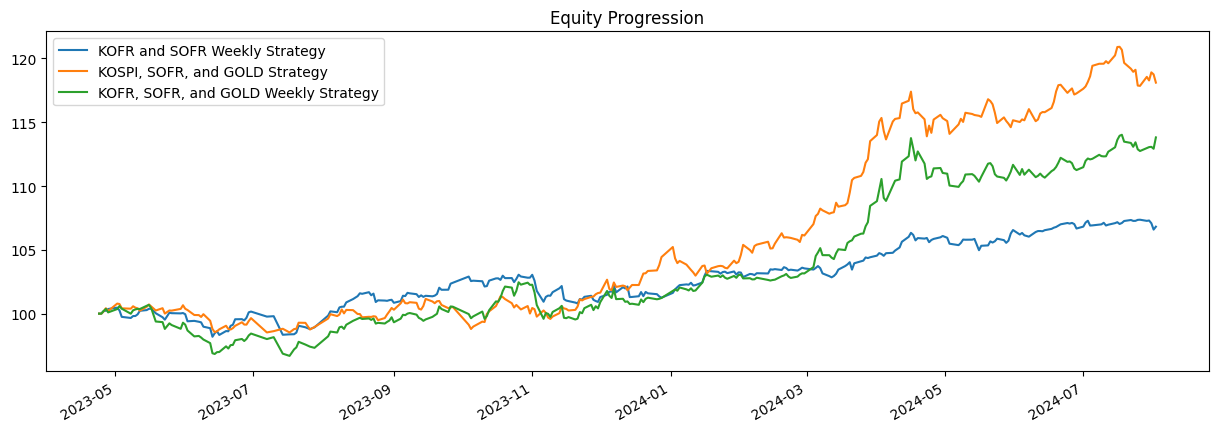

In [50]:
result.plot()

In [45]:
result.prices

,KOSPI and SOFR Strategy,"KOSPI, SOFR, and GOLD Strategy","KOSPI, SOFR, and GOLD Weekly Strategy"
2023-04-24,100.0000,100.0000,100.0000
2023-04-25,100.0000,100.0000,100.0000
2023-04-26,100.1510,100.1695,100.1695
2023-04-27,100.3105,100.4245,100.4245
2023-04-28,100.5230,100.2025,100.2025
...,...,...,...
2024-07-29,115.6805,118.5535,118.5540
2024-07-30,115.1690,118.2735,118.2715
2024-07-31,115.8380,118.9070,118.8980
2024-08-01,115.2920,118.7475,118.7305
